In [20]:
from __future__ import division
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy.random import randn
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=18)

plt.rc('figure', figsize=(15,10))
np.set_printoptions(precision=4)
# %matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
# PassengerId => 乘客ID
# Pclass => 乘客等级(1/2/3等舱位)
# Name => 乘客姓名
# Sex => 性别
# Age => 年龄
# SibSp => 堂兄弟/妹个数
# Parch => 父母与小孩个数
# Ticket => 船票信息
# Fare => 票价
# Cabin => 客舱
# Embarked => 登船港口

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 乘客各个属性分布

In [12]:
fig = plt.figure()
# %matplotlib inline
fig.set(alpha=0.2)#设置图标透明度
plt.rcParams['font.sans-serif']= ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

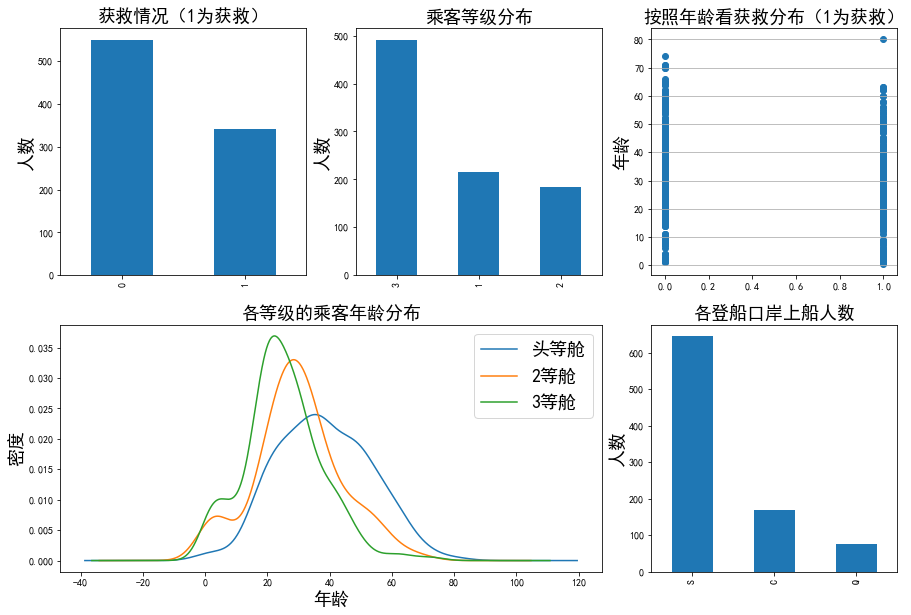

In [22]:
plt.subplot2grid((2,3),(0,0))
train.Survived.value_counts().plot(kind='bar')
plt.title(u'获救情况（1为获救）', fontproperties=font)
plt.ylabel(u'人数',fontproperties=font)

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind='bar')
plt.title(u'乘客等级分布',fontproperties=font)
plt.ylabel(u'人数',fontproperties=font)

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived, train.Age)
plt.title(u'按照年龄看获救分布（1为获救）',fontproperties=font)
plt.ylabel(u'年龄',fontproperties=font)
plt.grid(b=True, which='major', axis='y')

plt.subplot2grid((2,3),(1,0),colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel(u'年龄',fontproperties=font)
plt.ylabel(u'密度',fontproperties=font)
plt.title(u'各等级的乘客年龄分布',fontproperties=font)
plt.legend((u'头等舱', u'2等舱', u'3等舱'), loc='best',prop=font)

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.ylabel(u'人数',fontproperties=font)
plt.title(u'各登船口岸上船人数',fontproperties=font)
plt.savefig('1.png')

# plt.show()



# 属性与获救结果的关联统计

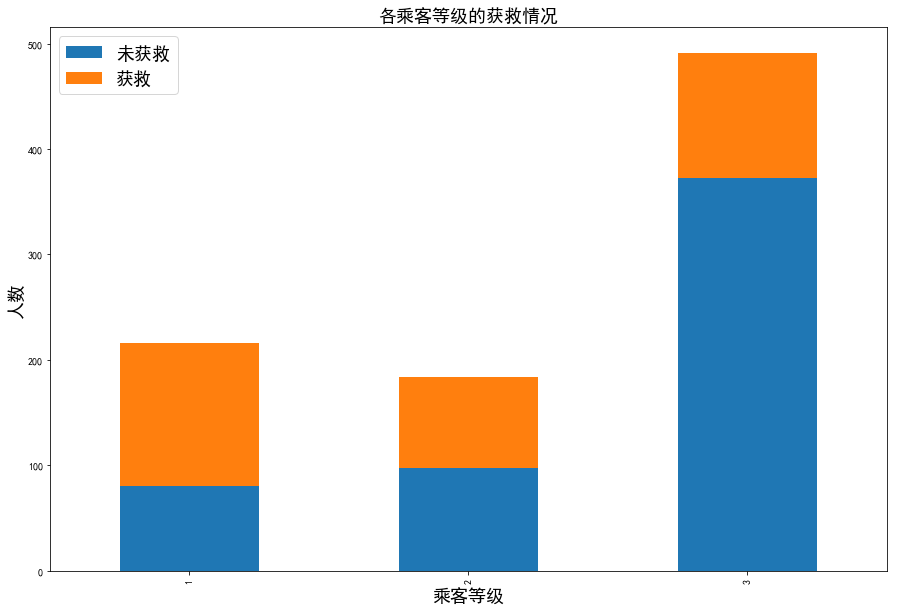

In [24]:
#看看各个乘客等级的获救情况

Survived0 = train.Pclass[train.Survived == 0].value_counts()
Survived1 = train.Pclass[train.Survived == 1].value_counts()

df = pd.DataFrame({'获救':Survived1, '未获救':Survived0})

df.plot(kind='bar', stacked=True)
plt.title(u'各乘客等级的获救情况', fontproperties = font)
plt.xlabel(u'乘客等级', fontproperties = font)
plt.ylabel(u'人数', fontproperties = font)
plt.legend((u'未获救', u'获救'), loc='best',prop=font)
plt.savefig('2.png')
plt.show()
# print df

# 看看各性别的获救情况

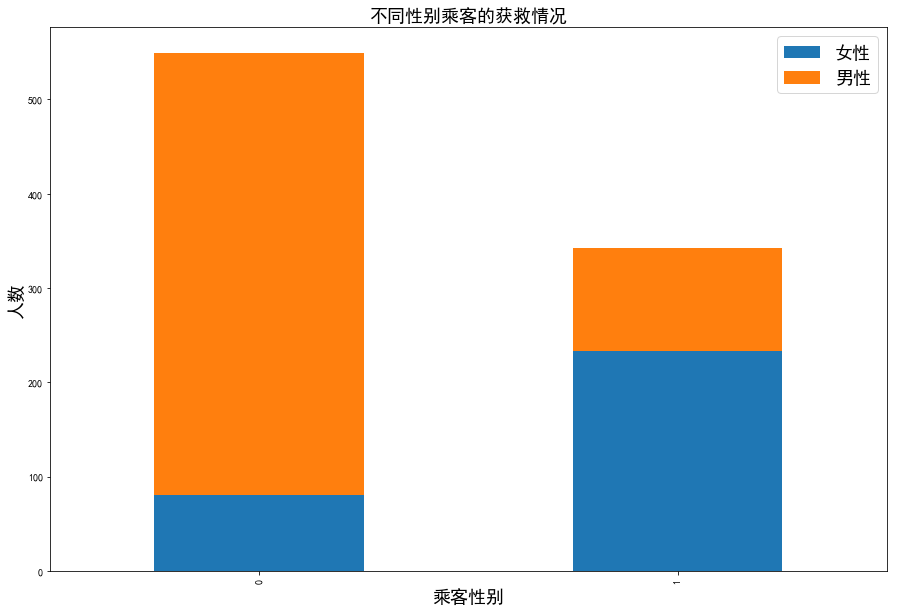

In [26]:
fig = plt.figure()
fig.set(alpha=0.2)

Survivedm = train.Survived[train.Sex == 'male'].value_counts()
Survivedf = train.Survived[train.Sex == 'female'].value_counts()

df = pd.DataFrame({'女性':Survivedf, '男性':Survivedm})
df.plot(kind='bar', stacked=True)
plt.title(u'不同性别乘客的获救情况', fontproperties = font)
plt.xlabel(u'乘客性别', fontproperties = font)
plt.ylabel(u'人数', fontproperties = font)
plt.legend((u'女性', u'男性'), loc='best',prop=font)
plt.savefig('3.png')
plt.show()

# 各种船舱级别情况下各个性别的获救情况

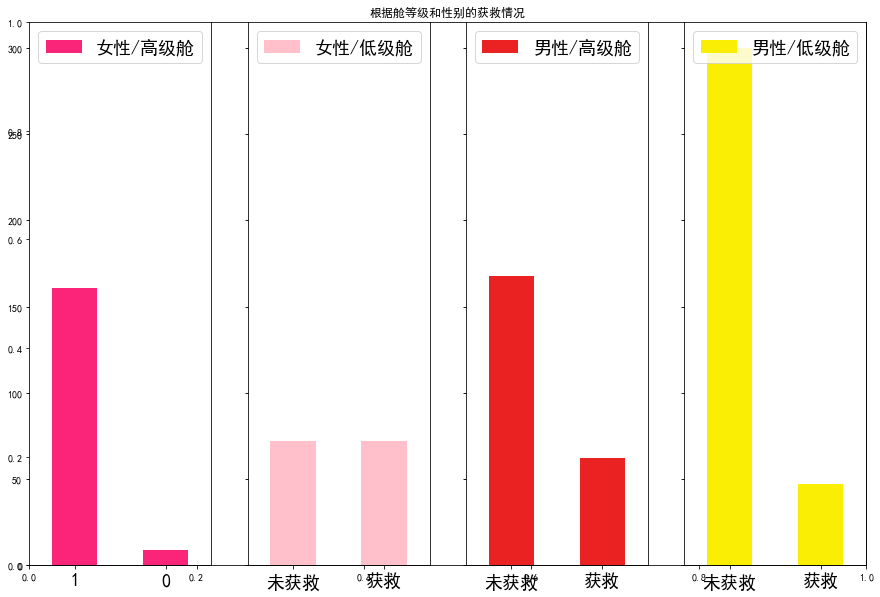

In [27]:
fig = plt.figure()
fig.set(alpha=0.65)
plt.title(u'根据舱等级和性别的获救情况')


ax1=fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(['1','0'], rotation=0,fontproperties=font)
ax1.legend([u"女性/高级舱"], loc='best', prop=font)

ax2=fig.add_subplot(142, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(kind='bar', label='female lowclass', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0,fontproperties=font)
plt.legend([u"女性/低级舱"], loc='best', prop=font)


ax3 = fig.add_subplot(143, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(kind='bar', label='male highclass', color='#EA2222')
ax3.set_xticklabels([u'未获救',u'获救'], rotation=0,fontproperties=font)
ax3.legend([u"男性/高级舱"], loc='best', prop=font)

ax4 = fig.add_subplot(144, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', label='female lowclass', color='#FAEE04')
ax4.set_xticklabels([u'未获救', u'获救'], rotation=0,fontproperties=font)
ax4.legend([u"男性/低级舱"], loc='best', prop=font)
plt.savefig('4.png')
plt.show()




# 各个登船港口的乘客的获救情况

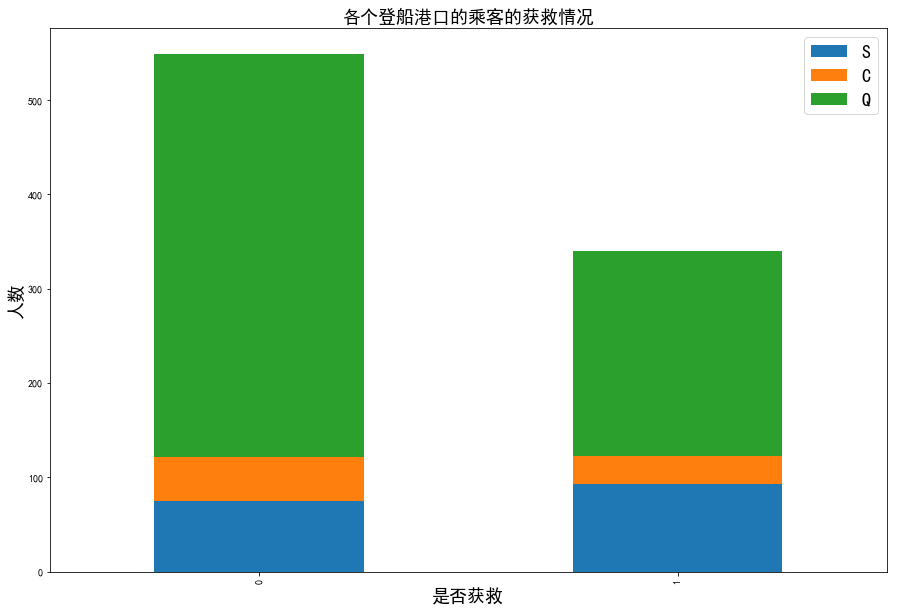

In [28]:
fig = plt.figure()
fig.set(alpha=0.4)

Survived0 = train.Survived[train.Embarked =='S'].value_counts()
Survived1 = train.Survived[train.Embarked =='C'].value_counts()
Survived2 = train.Survived[train.Embarked =='Q'].value_counts()

df = pd.DataFrame({'S':Survived0, 'C':Survived1, 'Q':Survived2})
df.plot(kind='bar', stacked=True)
plt.title(u'各个登船港口的乘客的获救情况', fontproperties = font)
plt.xlabel(u'是否获救', fontproperties = font)
plt.ylabel(u'人数', fontproperties = font)
plt.legend(('S', 'C','Q'), loc='best',prop=font)
plt.savefig('5.png')
plt.show()

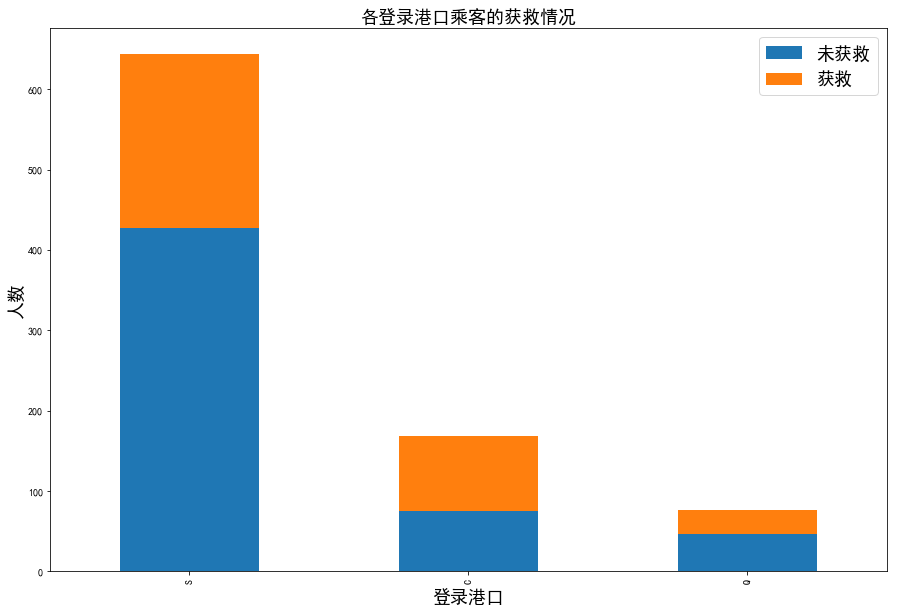

In [29]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train.Embarked[train.Survived == 0].value_counts()
Survived_1 = train.Embarked[train.Survived == 1].value_counts()
df=pd.DataFrame({ u'未获救':Survived_0,u'获救':Survived_1,})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况",fontproperties=font)
plt.xlabel(u"登录港口",fontproperties=font) 
plt.ylabel(u"人数",fontproperties=font) 
plt.legend((u'未获救',u'获救'),loc='best',prop=font)
plt.savefig('6.png')
plt.show()

# 堂兄弟/妹，孩子/父母有几人对是否获救是否有影响

In [30]:
g = train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print df

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [31]:
g1 = train.groupby(['Parch','Survived'])
df1 = pd.DataFrame(g1.count()['PassengerId'])
print df1

                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [32]:
#看一下船票编号
len(train[train.Cabin.notnull()])


204

In [33]:
#cabin只有204个乘客有值，先看看它的分布
train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

# 按Cabin有无看获救情况

In [34]:
fig = plt.figure()
fig.set(alpha=0.2)

[None]

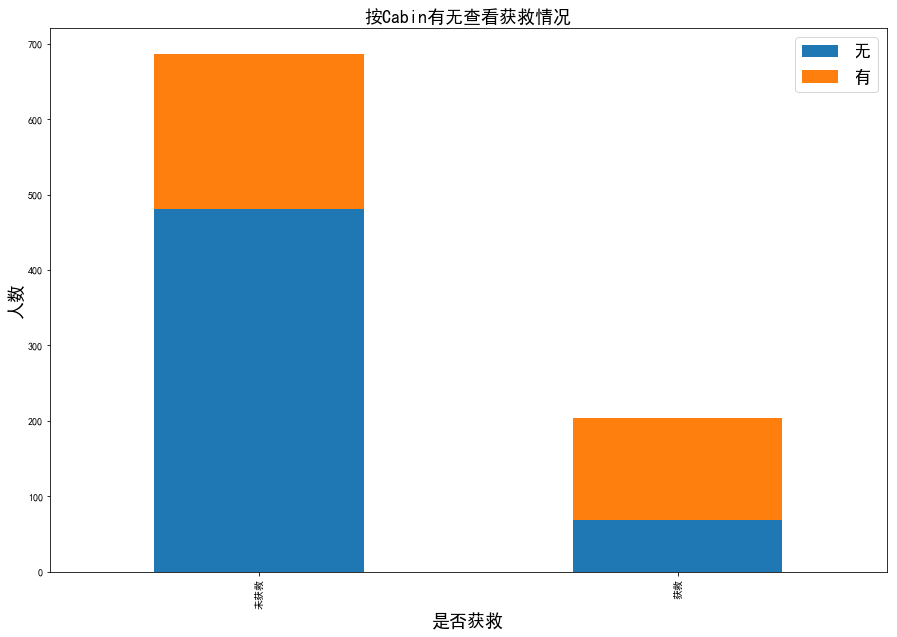

In [35]:
Survived_ca = train[train.Cabin.notnull()].Survived.value_counts()
Survived_noca = train[train.Cabin.isnull()].Survived.value_counts()
# 与下面等价
# Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
# Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()
# 与下面等价
# Survived_ca = train.Survived[train.Cabin.notnull()==True].value_counts()
# Survived_noca = train.Survived[train.Cabin.isnull()==True].value_counts()
# train.Survived[train.Sex == 'female'].value_counts()

df = pd.DataFrame({u'获救':Survived_ca, u'未获救':Survived_noca}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u'按Cabin有无查看获救情况', fontproperties = font)
plt.xlabel(u'是否获救', fontproperties = font)
plt.ylabel(u'人数', fontproperties = font)
plt.legend((u'无' ,u'有'), loc='best',prop=font)
plt.savefig('7.png')
plt.show()



# fig = plt.figure()
# fig.set(alpha=0.2)  # 设定图表颜色alpha参数

# Survived_0 = train.Embarked[train.Survived == 0].value_counts()
# Survived_1 = train.Embarked[train.Survived == 1].value_counts()
# df=pd.DataFrame({ u'未获救':Survived_0,u'获救':Survived_1,})
# df.plot(kind='bar', stacked=True)
# plt.title(u"各登录港口乘客的获救情况",fontproperties=font)
# plt.xlabel(u"登录港口",fontproperties=font) 
# plt.ylabel(u"人数",fontproperties=font) 
# plt.legend((u'未获救',u'获救'),loc='best',prop=font)
# plt.show()

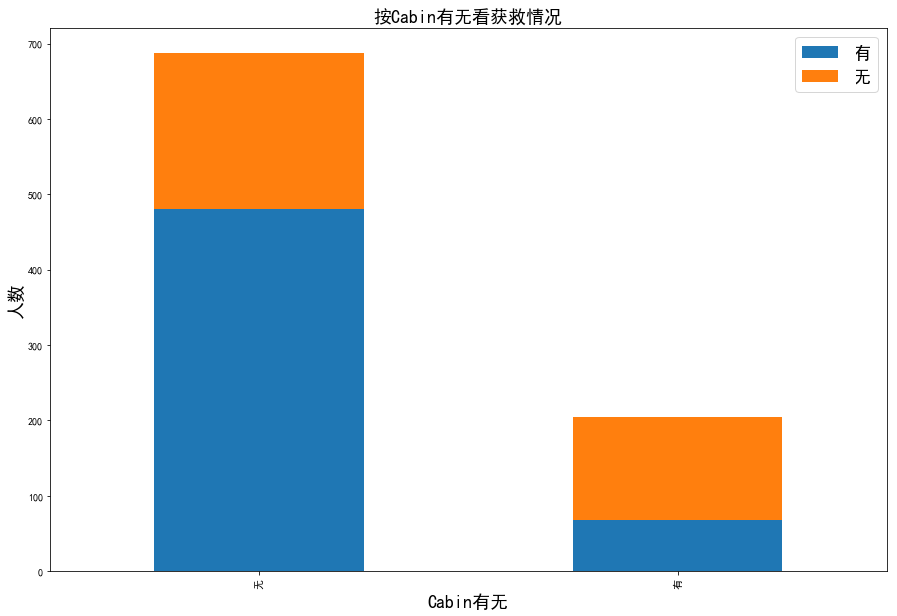

In [36]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况", fontproperties=font)
plt.xlabel(u"Cabin有无", fontproperties=font) 
plt.ylabel(u"人数", fontproperties=font)
plt.legend((u'有' ,u'无'), loc='best',prop=font)
plt.savefig('8.png')
plt.show()